<a href="https://colab.research.google.com/github/InSpira4/CS5617-DataScienceProject/blob/sugi/Descriptive_Sugi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Natera-JanFirstWeek.csv');
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,1/7/2019,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


In [0]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [0]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [0]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [0]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'):
    return True
  else:
    return False
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [0]:
df.to_csv('/content/drive/My Drive/output.csv', header=True)

In [8]:
df.corr(method ='pearson') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
Charges,1.000000,0.230978,0.224267,0.054464,0.602983,0.337974,0.411184,-0.125417,NaN,0.040090
Payments,0.230978,1.000000,0.987367,0.133075,0.256541,-0.089432,-0.090228,0.308807,NaN,0.326863
Insurance Payment,0.224267,0.987367,1.000000,-0.025644,0.243422,-0.085509,-0.084606,0.311258,NaN,0.315086
Patient Payment,0.054464,0.133075,-0.025644,1.000000,0.095934,-0.029372,-0.040050,0.001367,NaN,0.091338
Writeoffs,0.602983,0.256541,0.243422,0.095934,1.000000,-0.202158,-0.175613,-0.013820,NaN,0.230787
Insurance Bal,0.337974,-0.089432,-0.085509,-0.029372,-0.202158,1.000000,-0.151268,-0.122290,NaN,-0.158679
Patient Bal,0.411184,-0.090228,-0.084606,-0.040050,-0.175613,-0.151268,1.000000,-0.128242,NaN,-0.143436
Allowed Amount,-0.125417,0.308807,0.311258,0.001367,-0.013820,-0.122290,-0.128242,1.000000,NaN,0.351711
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accepted,0.040090,0.326863,0.315086,0.091338,0.230787,-0.158679,-0.143436,0.351711,NaN,1.000000


In [9]:
df.corr(method ='kendall') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
Charges,1.000000,0.047993,0.028629,0.051909,0.287593,0.040812,0.204049,-0.053816,NaN,0.007584
Payments,0.047993,1.000000,0.949179,0.233787,0.364663,-0.234908,-0.224430,0.482303,NaN,0.570710
Insurance Payment,0.028629,0.949179,1.000000,-0.057318,0.337601,-0.224789,-0.207667,0.496471,NaN,0.556898
Patient Payment,0.051909,0.233787,-0.057318,1.000000,0.118146,-0.061537,-0.082451,0.010391,NaN,0.114412
Writeoffs,0.287593,0.364663,0.337601,0.118146,1.000000,-0.394611,-0.147482,0.232751,NaN,0.343458
Insurance Bal,0.040812,-0.234908,-0.224789,-0.061537,-0.394611,1.000000,-0.417806,-0.192651,NaN,-0.244944
Patient Bal,0.204049,-0.224430,-0.207667,-0.082451,-0.147482,-0.417806,1.000000,-0.106647,NaN,-0.103922
Allowed Amount,-0.053816,0.482303,0.496471,0.010391,0.232751,-0.192651,-0.106647,1.000000,NaN,0.413528
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
accepted,0.007584,0.570710,0.556898,0.114412,0.343458,-0.244944,-0.103922,0.413528,NaN,1.000000


In [10]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set default Seaborn style
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def compareColsWithClaimAcceptance(colName):
  yes = []
  no = []
  labels = df[colName].unique()
  count = df
  for label in labels:
      yes.append(df[df[colName] == label].accepted.sum())
      no.append(df[df[colName] == label].accepted.count() - df[df[colName] == label].accepted.sum())
  raw_data = {'labels': labels, 'accepted': yes, 'deineid': no}
  fc_compared = pd.DataFrame(raw_data)
  ax = fc_compared.plot.bar(x='labels', rot=0, figsize=(30,10), log = True)
  return

Compare Descrete varibles with claim acceptance



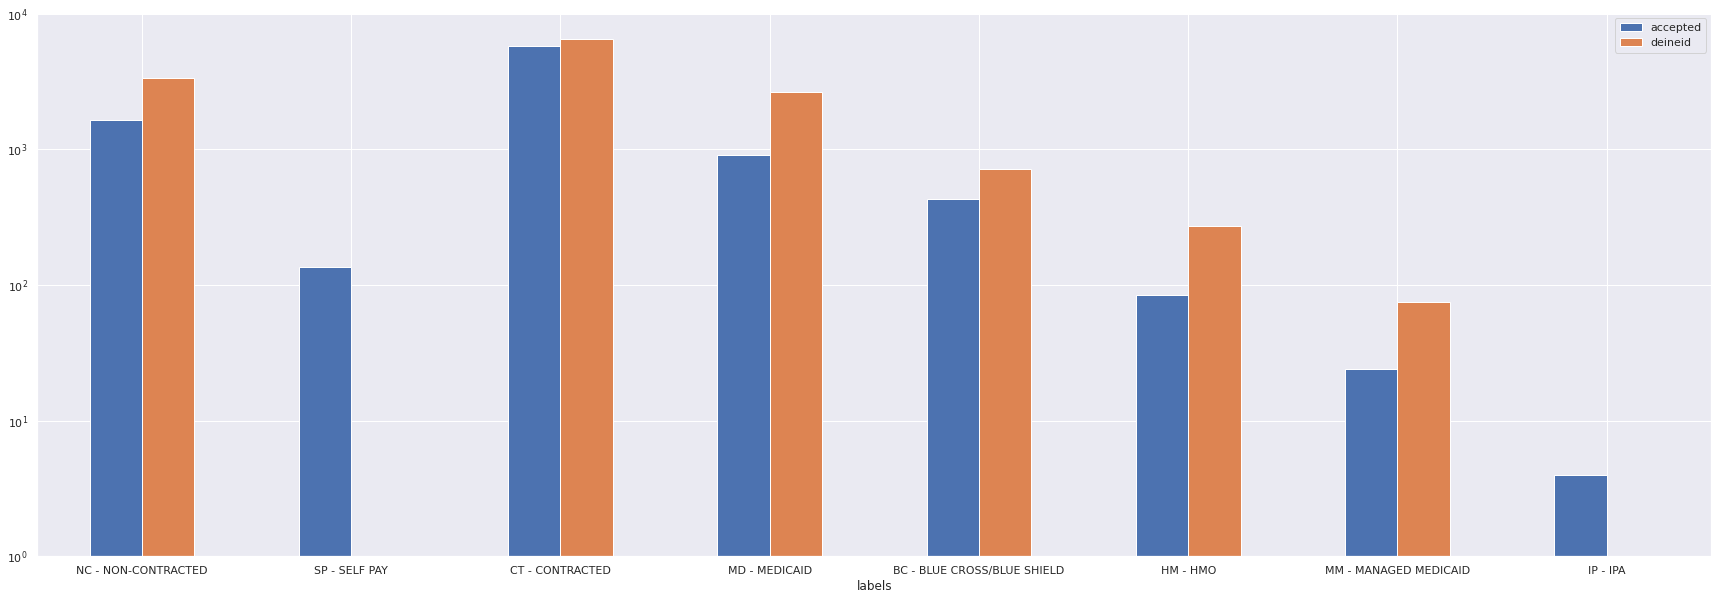

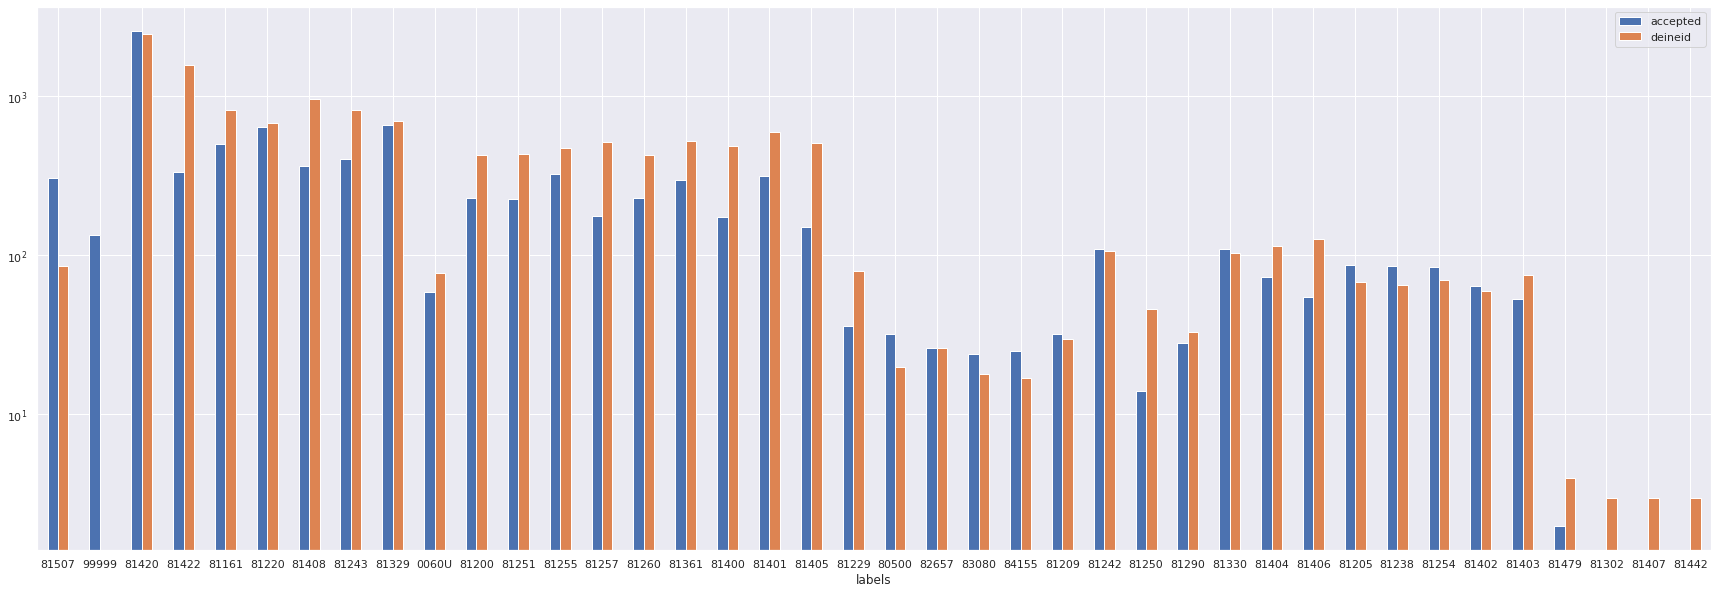

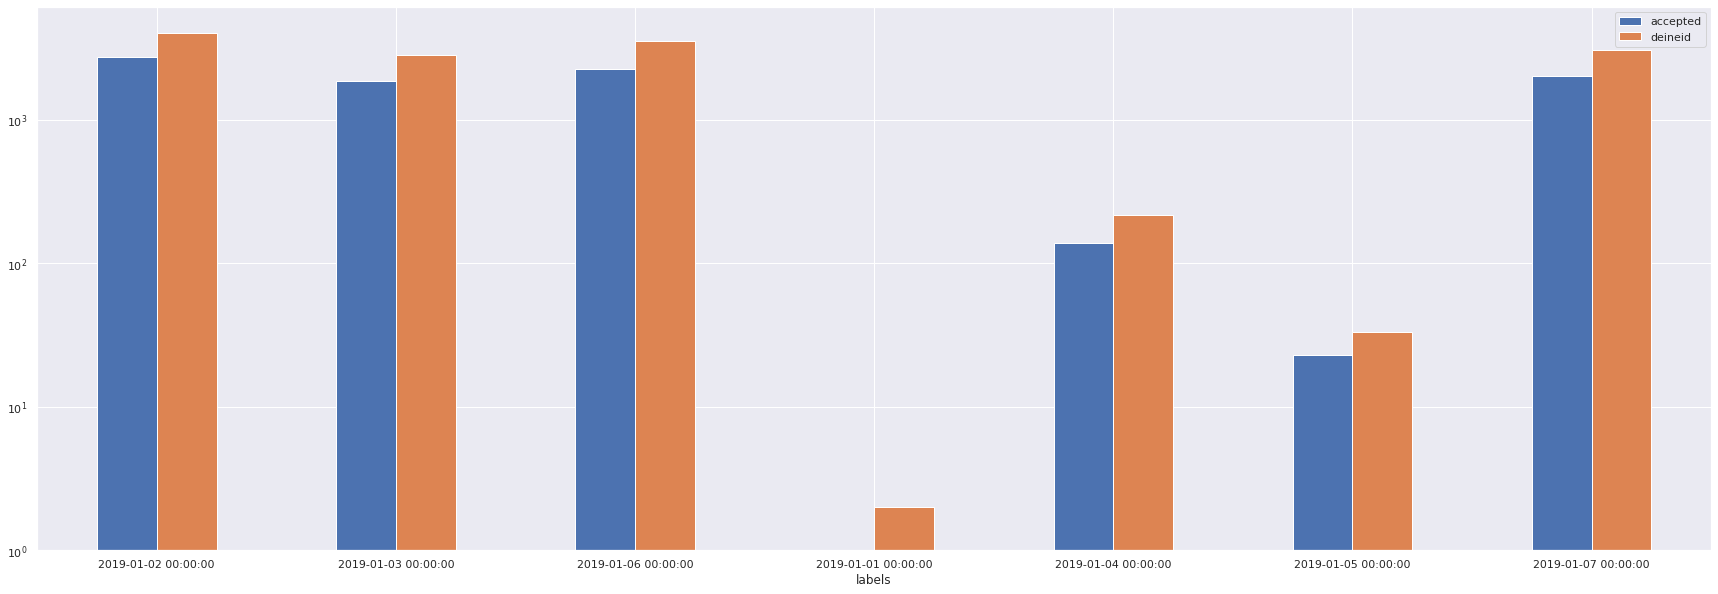

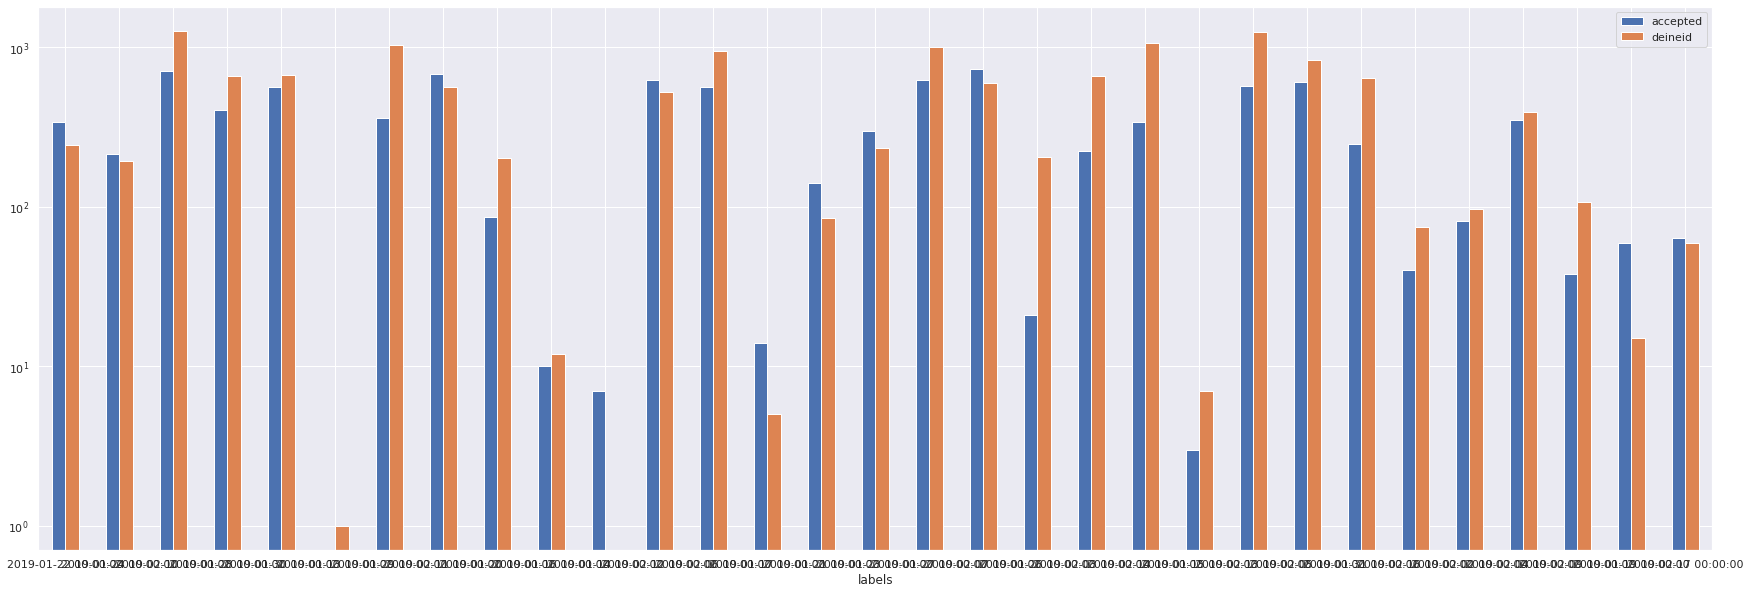

In [12]:
descrete_cols = ['FinancialClass', 'CPT', 'Date of Service', 'Payment Post Date']
for col in descrete_cols:
  compareColsWithClaimAcceptance(col)

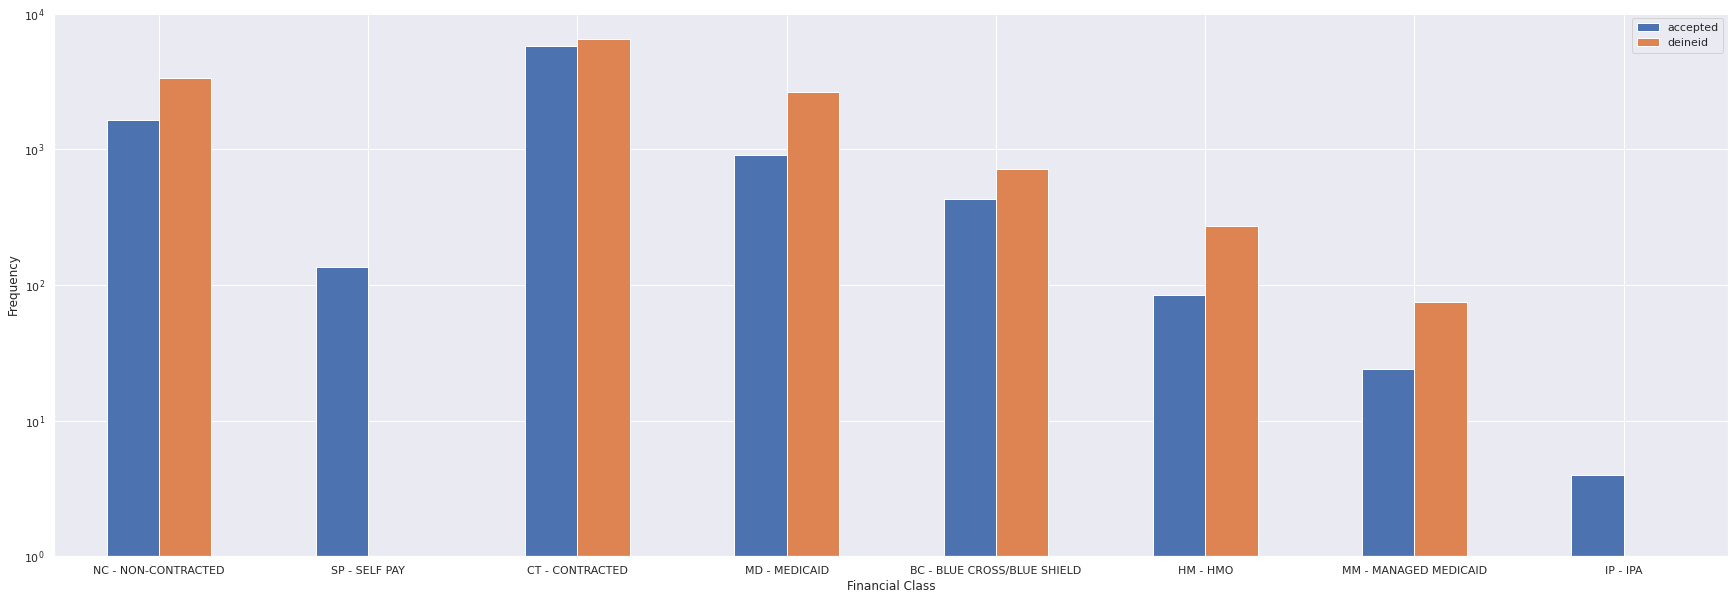

In [13]:
def compareColsWithClaimAcceptance123(colName):
  yes = []
  no = []
  labels = df[colName].unique()
  count = df
  for label in labels:
      yes.append(df[df[colName] == label].accepted.sum())
      no.append(df[df[colName] == label].accepted.count() - df[df[colName] == label].accepted.sum())
  raw_data = {'labels': labels, 'accepted': yes, 'deineid': no}
  fc_compared = pd.DataFrame(raw_data)
  ax = fc_compared.plot.bar(x='labels', rot=0, figsize=(30,10), log = True)
  ax.set_xlabel('Financial Class')
  ax.set_ylabel('Frequency')
  plt.savefig("FinancialClass-Acceptance.png")
  files.download("FinancialClass-Acceptance.png") 
  return
compareColsWithClaimAcceptance123('FinancialClass')

We can see some fincial class don't have rejections

In [0]:
# dataFrame = pd.DataFrame(data=data, columns=['CPT','Charges']);

 

# Draw a scatter plot
# colors = np.where(df[df['FinancialClass'] != 'SP - SELF PAY'].accepted, 'r', 'k')

# df[df['FinancialClass'] != 'SP - SELF PAY'].plot.scatter(x='CPT', y='Charges', c=colors, title= "Scatter plot between two variables X and Y", figsize=(30,20));
# plt.legend();

In [15]:
carriers = []
selected_cpts = []
labels = df['Carrier Code'].unique()
for label in labels:
  if(df[df['Carrier Code'] == label].accepted.count() > 200):
    carriers.append(label)
print(carriers)

df_with_ccariers = df[df['Carrier Code'].isin(carriers)]


['CFHP-E2', 'AETLIF-E', 'BCBSTX-E', 'CIG-E', 'BCBSIN-E', 'BCBSMI-E', 'BCBSH-E', 'TCMDTX-E', 'UHC2-E', 'SHP-E', 'BSCA-E', 'BCBSFL-E', 'PSHP-E', 'HONJ-E', 'AMERIG-E', 'BSCA-E2', 'TRI00', 'AMERI-E', 'MDMI-E', 'BCBSMA-E']


AttributeError: ignored

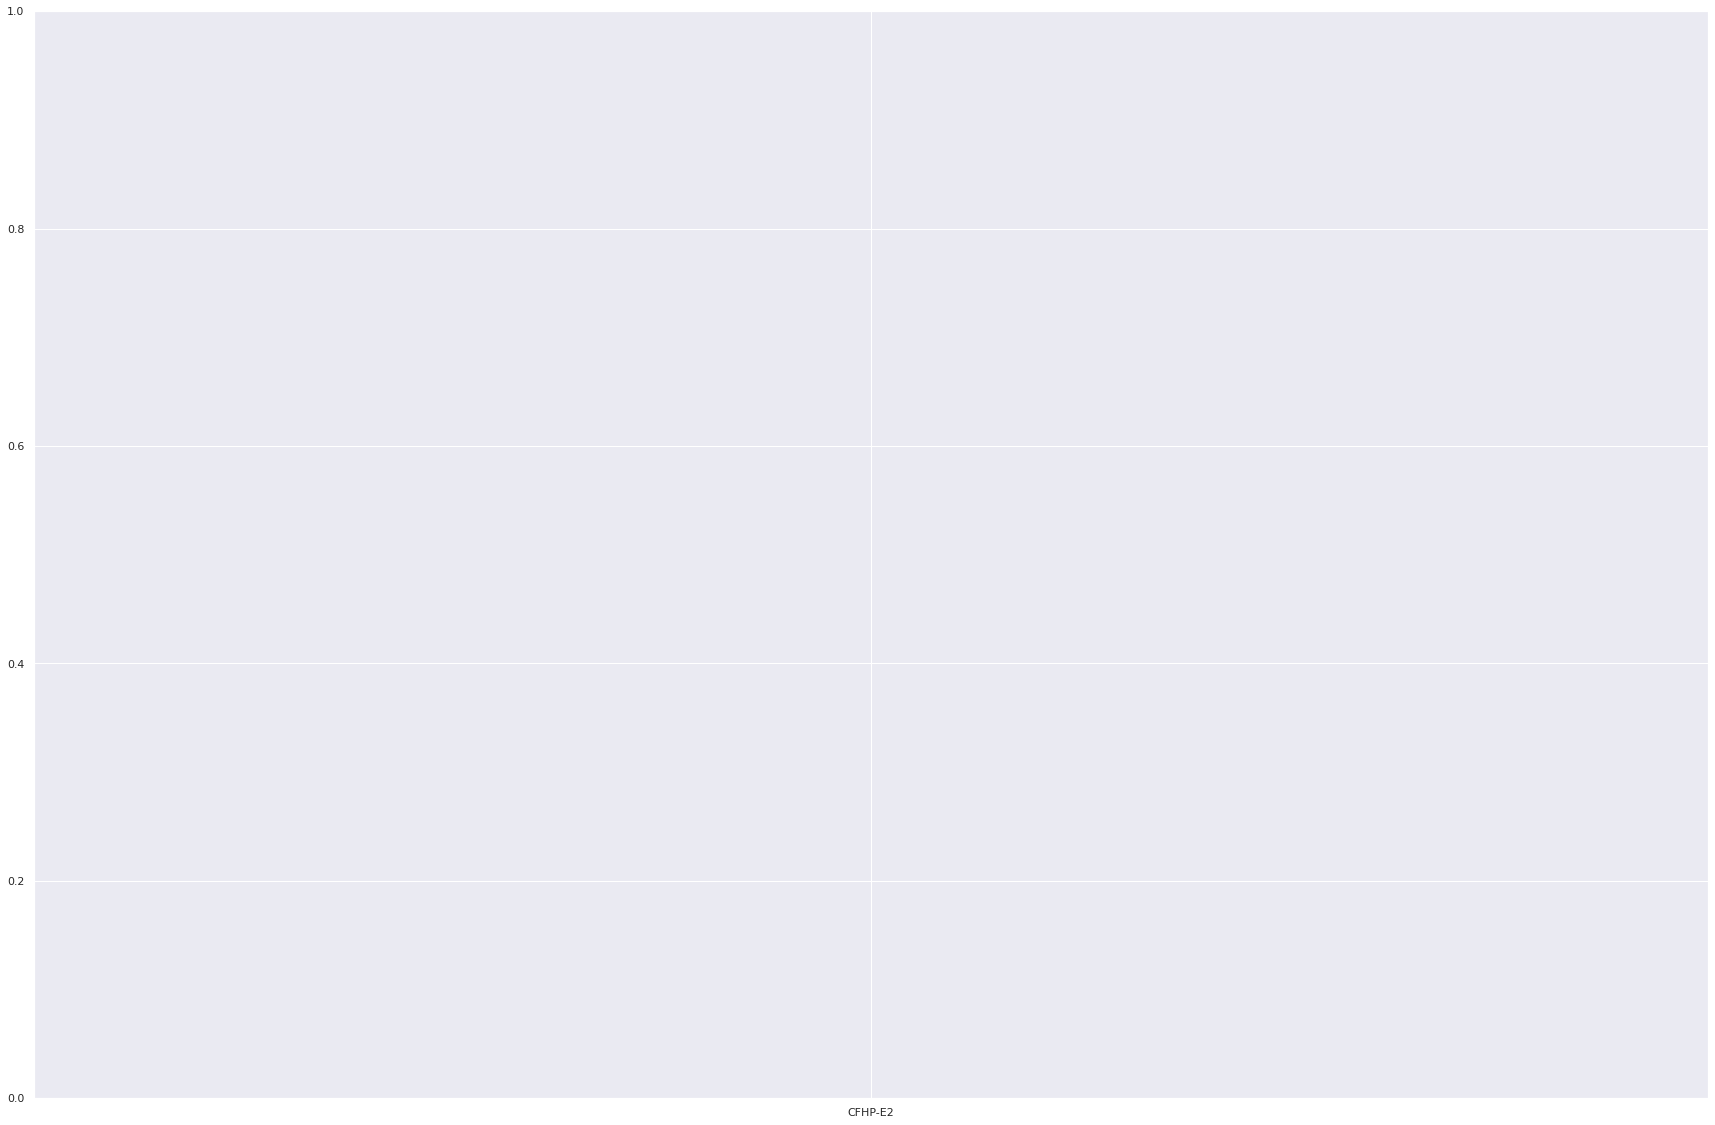

In [27]:
# Draw a scatter plot
df_with_ccariers
# Draw a scatter plot
colors = np.where(df_with_ccariers.accepted, 'r', 'k')

ax = df_with_ccariers.plot.scatter(x='Carrier Code', y='Charges', c=colors, figsize=(30,20), log = True);
plt.savefig("CarrierCode-Charges.png")
files.download("CarrierCode-Charges.png") 
plt.legend();

In [17]:
selected_cpts = []
cpts =df_with_ccariers['CPT'].unique()
for label in cpts:
  if(df_with_ccariers[df_with_ccariers['CPT'] == label].accepted.count() > 200):
    selected_cpts.append(label)
print(selected_cpts)
df_with_ccariers_with_cpts = df_with_ccariers[df_with_ccariers['CPT'].isin(selected_cpts)]

['81507', '81420', '81422', '81161', '81220', '81408', '81243', '81329', '81200', '81251', '81255', '81257', '81260', '81361', '81400', '81401', '81405']


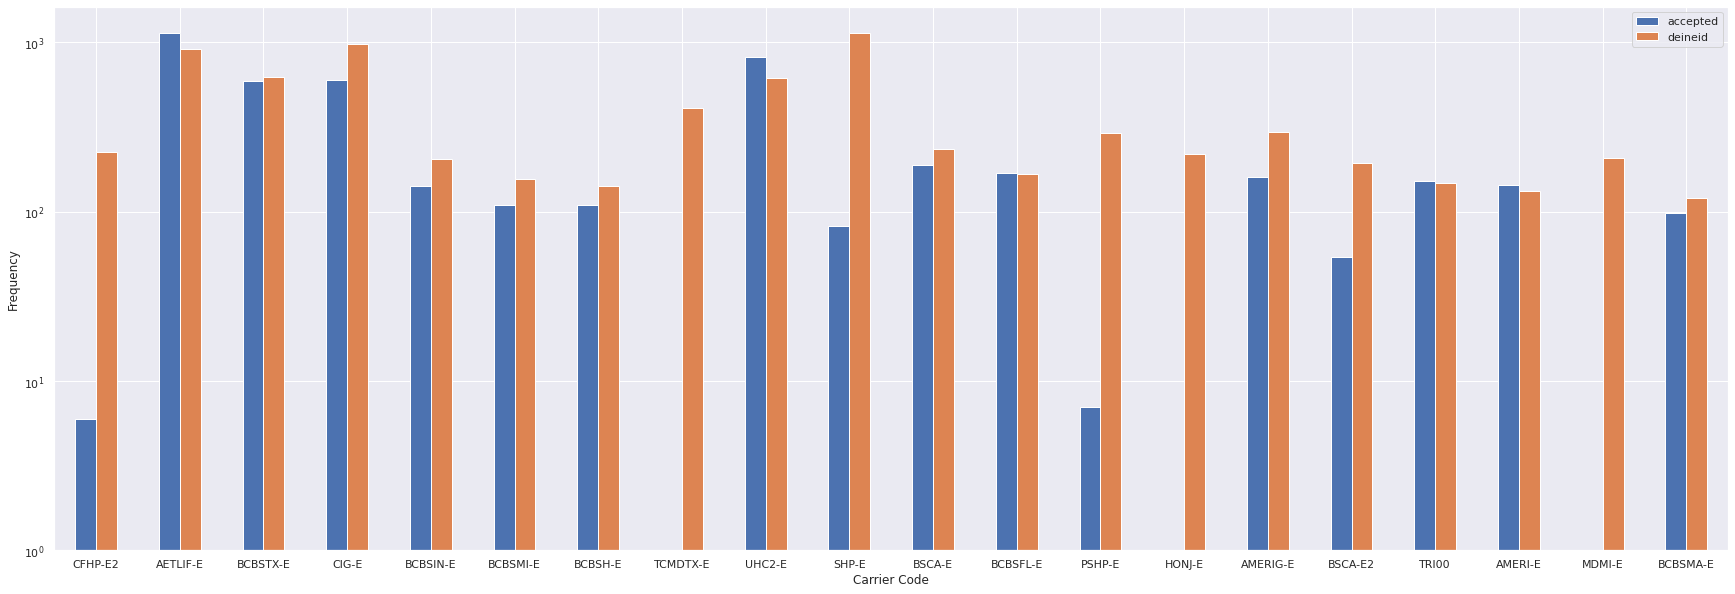

In [18]:
def compareColsWithClaimAcceptance1(dataframe, colName):
  yes = []
  no = []
  labels = dataframe[colName].unique()
  count = dataframe
  for label in labels:
      yes.append(dataframe[dataframe[colName] == label].accepted.sum())
      no.append(dataframe[dataframe[colName] == label].accepted.count() - dataframe[dataframe[colName] == label].accepted.sum())
  raw_data = {'labels': labels, 'accepted': yes, 'deineid': no}
  fc_compared = pd.DataFrame(raw_data)
  ax = fc_compared.plot.bar(x='labels', rot=0, figsize=(30,10), log = True)
  ax.set_xlabel('Carrier Code')
  ax.set_ylabel('Frequency')
  plt.savefig("carrierCode-Acceptance.png")
  files.download("carrierCode-Acceptance.png") 
  return
compareColsWithClaimAcceptance1(df_with_ccariers_with_cpts, 'Carrier Code')

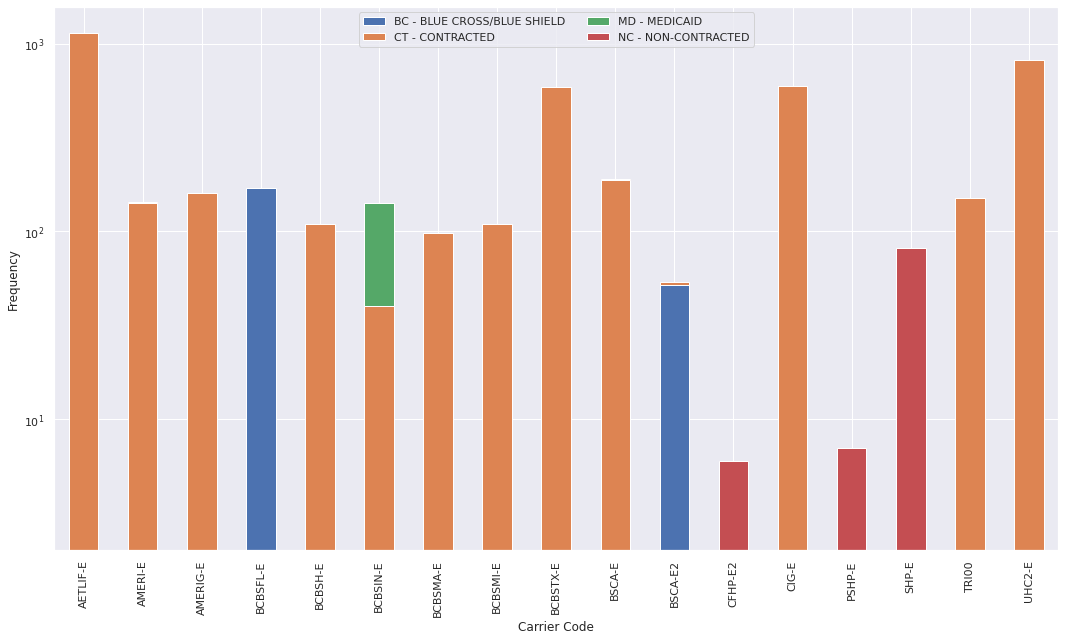

In [53]:
ax = df_with_ccariers_with_cpts[df_with_ccariers_with_cpts.accepted == True].groupby(['Carrier Code', 'FinancialClass']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,10), log = True)
plt.legend(loc='upper center', ncol=2)
ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-FC-AcceptanceTrue-FilteredCPT.png")
files.download("carrierCode-FC-AcceptanceTrue-FilteredCPT.png") 

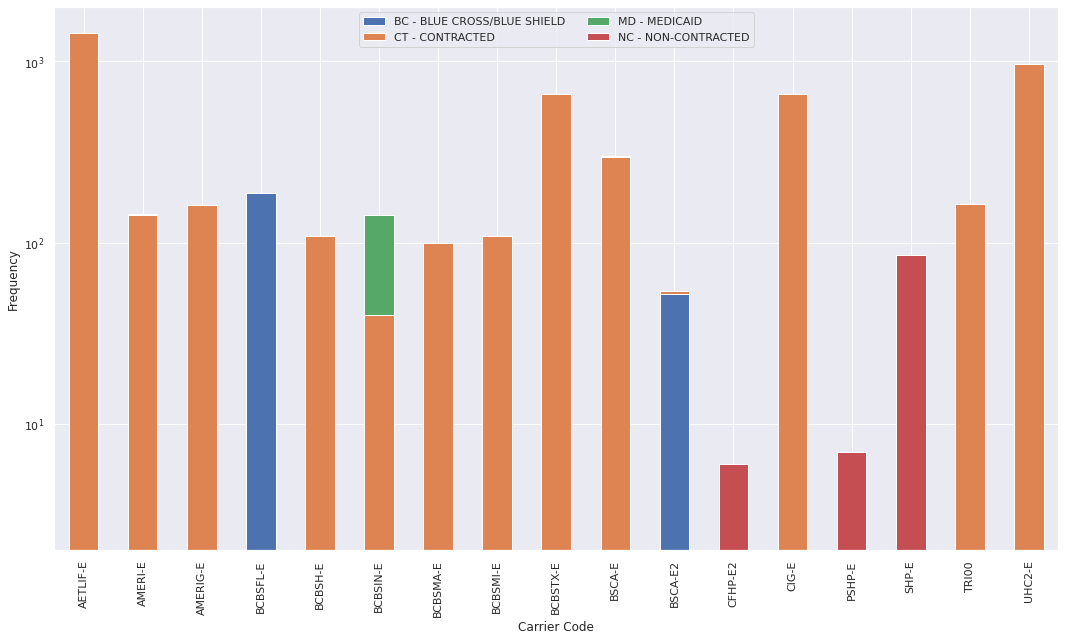

In [60]:
ax = df_with_ccariers[df_with_ccariers.accepted == True].groupby(['Carrier Code', 'FinancialClass']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,10), log = True)
plt.legend(loc='upper center', ncol=2)
ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-FC-AcceptanceTrue.png")
files.download("carrierCode-FC-AcceptanceTrue.png") 

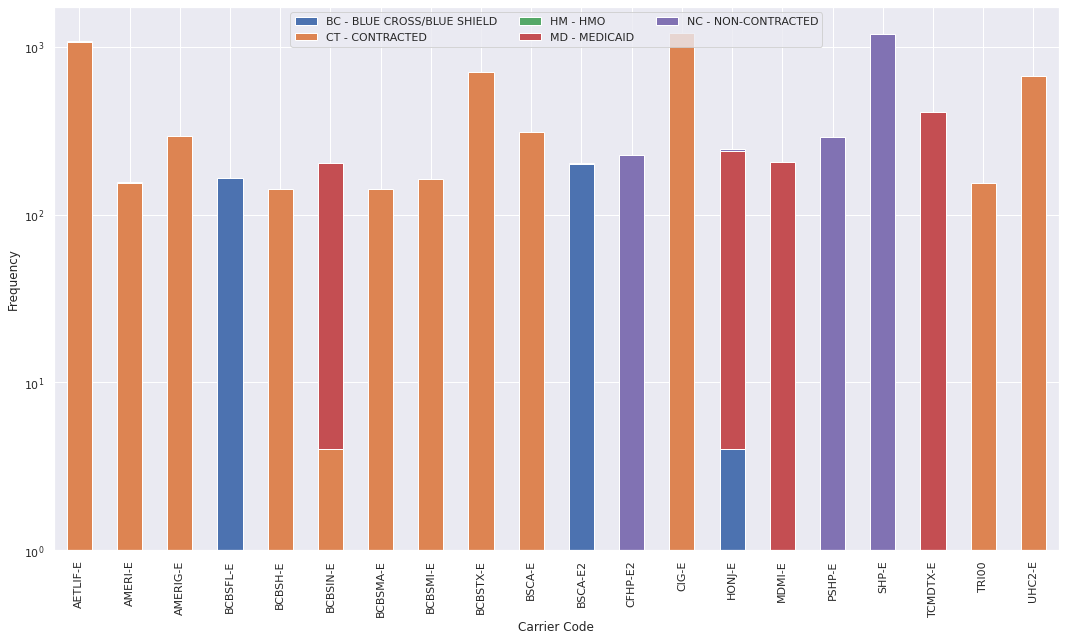

In [62]:
ax = df_with_ccariers[df_with_ccariers.accepted == False].groupby(['Carrier Code', 'FinancialClass']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,10), log = True)
plt.legend(loc='upper center', ncol=3)
ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-FC-AcceptanceFalse.png")
files.download("carrierCode-FC-AcceptanceFalse.png")

In [0]:
ax = df_with_ccariers_with_cpts[df_with_ccariers_with_cpts.accepted == False].groupby(['Carrier Code', 'FinancialClass']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,10), log = True)
plt.legend(loc='upper center', ncol=3)
ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-FC-AcceptanceFalse-FilteredCPT.png")
files.download("carrierCode-FC-AcceptanceFalse-FilteredCPT.png")

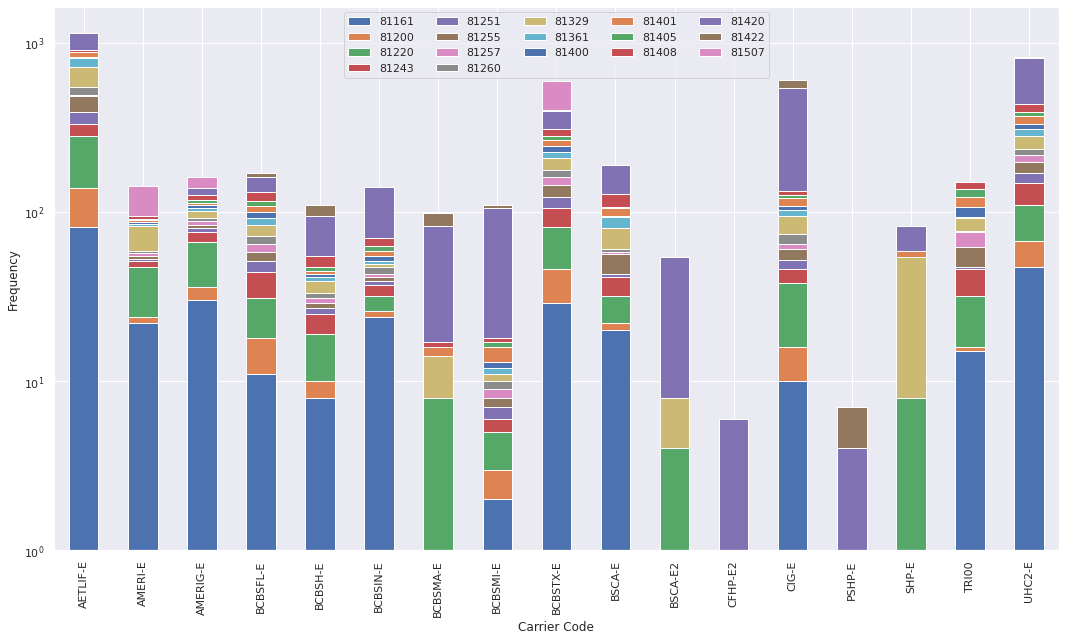

In [55]:
ax = df_with_ccariers_with_cpts[df_with_ccariers_with_cpts.accepted == True].groupby(['Carrier Code', 'CPT']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,10), log = True)
plt.legend(loc='upper center', ncol=5)

ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-CPT-AcceptanceTrue-FilteredCPT.png")
files.download("carrierCode-CPT-AcceptanceTrue-FilteredCPT.png") 

In [0]:
ax = df_with_ccariers_with_cpts[df_with_ccariers_with_cpts.accepted == False].groupby(['Carrier Code', 'CPT']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,12), log = True)
plt.legend(loc='upper left', ncol=9)
ax.set_xlabel('Carrier Code')
ax.set_ylabel('Frequency')
plt.savefig("carrierCode-CPT-AcceptanceFalse-FilteredCPT.png")
files.download("carrierCode-CPT-AcceptanceFalse-FilteredCPT.png") 

In [0]:
df_with_ccariers['DateDiffernce'] = df_with_ccariers['First Billed Date'] - df_with_ccariers['Date of Service']
df_with_ccariers['DateDiffernce'] = df_with_ccariers['DateDiffernce'] / np.timedelta64(1 ,'D')
df_with_ccariers['DateDiffernce']

df_with_ccariers[df_with_ccariers.accepted == True].groupby(['Carrier Code', 'DateDiffernce']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,18), log = True)


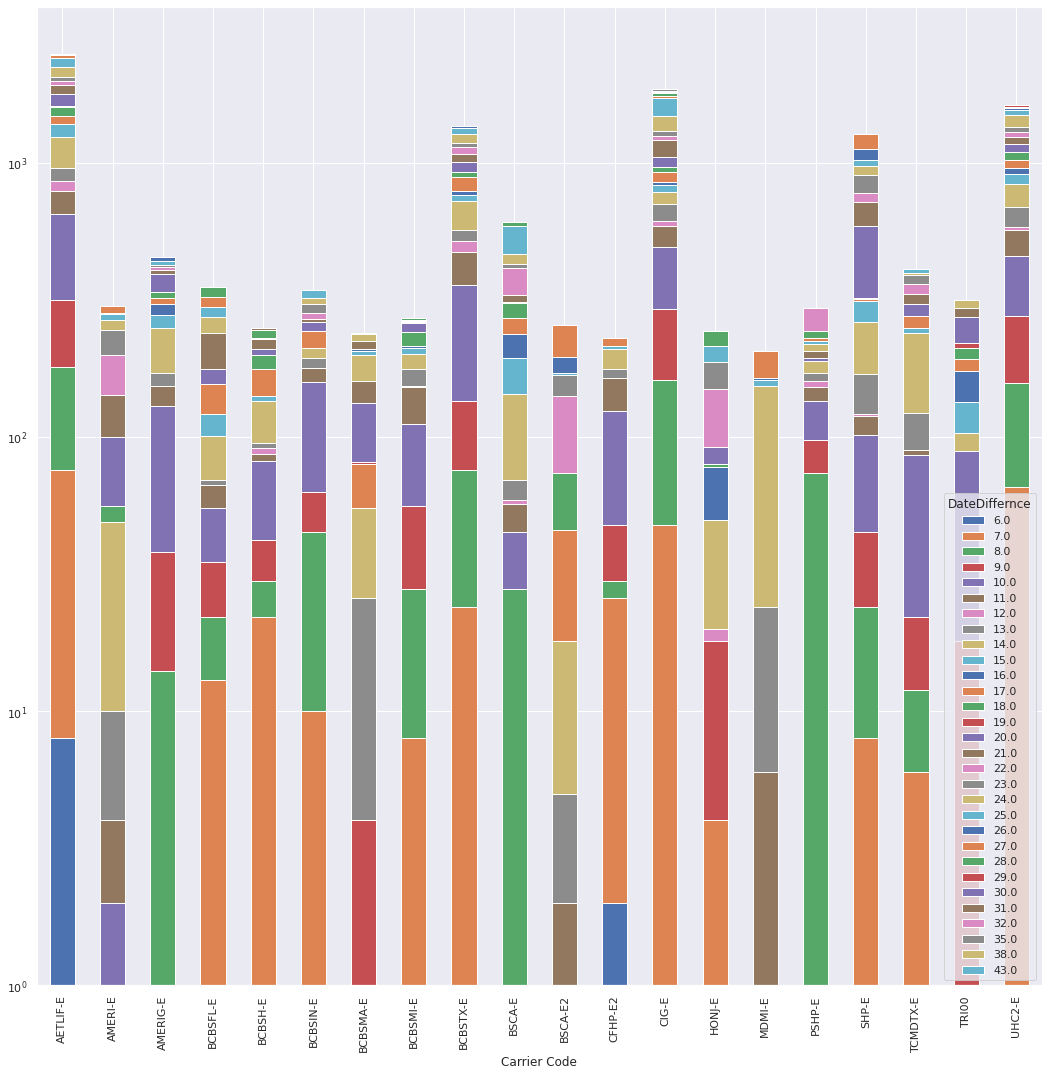

In [24]:
df_with_ccariers.groupby(['Carrier Code', 'DateDiffernce']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,18), log = True)
